In [5]:
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

import numpy as np
import pandas as pd

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##Import data

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
bioresponce = pd.read_csv('/content/drive/My Drive/Datasets/bioresponse.csv', header=0, sep = ",")

In [9]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
bioresponce.shape

(3751, 1777)

In [11]:
bioresponce_target = bioresponce.Activity.values
bioresponce_target.shape

(3751,)

In [12]:
bioresponce_data = bioresponce.iloc[:, 1:] 
train_data, test_data, train_labels, test_labels = train_test_split(bioresponce_data, bioresponce_target, test_size = 0.3,random_state = 1)

##Some methods

In [125]:
def get_ROC_plot(classifier, Y_true, Y_predict, label=""):
  fpr, tpr, threshold = metrics.roc_curve(Y_true, Y_predict)
  classifier = metrics.roc_auc_score(Y_true, Y_predict)
  plt.figure(figsize=(7, 5))
  plt.plot(fpr,tpr,'b-', label="{0} AUC: {1:.3f}".format(label,classifier))
  plt.plot([0,1],[0,1],'m--')
  plt.legend(loc="lower right")
  plt.title("ROC curve for ".format(label))
  plt.grid(True)
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.show()

In [126]:
def get_metrics(classifier,Y_true,Y_predict, label=""):
  print("Metrics for",label)
  print("Precision:\t{0:.3f}\nRecall: \t{1:.3f}\nAccurancy:\t{2:.3f}\nF1-score:\t{3:.3f}".format(
      metrics.precision_score(Y_true, Y_predict),
      metrics.recall_score(Y_true, Y_predict),
      metrics.accuracy_score(Y_true, Y_predict),
      metrics.f1_score(Y_true, Y_predict)))
  Y_predict = classifier.predict_proba(test_data)
  Y_predict = Y_predict[:,1]
  print("Log_loss:\t{0:.3f}".format(metrics.log_loss(Y_true, Y_predict)))

In [127]:
def get_prec_recall_plot(Y_true, Y_predict, label_plot=""):
  precs = []
  recs = []
  threshs = []
  for Y_predict, Y_true in zip([Y_predict],[Y_true]):
    prec, rec, thresh = metrics.precision_recall_curve(Y_true,Y_predict)
    precs.append(prec)
    recs.append(rec)
    threshs.append(thresh)

  plt.figure(figsize=(7, 5))
  plt.grid(True)
  plt.plot(threshs[0], precs[0][:-1], label="precision")
  plt.plot(threshs[0], recs[0][:-1], label="recall")
  plt.xlabel("threshold")
  plt.title("Precision, recall curves for {0}".format(label_plot))
  plt.legend()

##Small decision tree 

In [128]:
small_tree_estimator = tree.DecisionTreeClassifier(random_state=42, max_depth = 2)
#training of the classifier
small_tree_estimator.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [129]:
small_tree_predictions = small_tree_estimator.predict(test_data)
get_metrics(small_tree_estimator,test_labels,small_tree_predictions,"Small tree")

Metrics for Small tree
Precision:	0.749
Recall: 	0.852
Accurancy:	0.760
F1-score:	0.797
Log_loss:	0.531


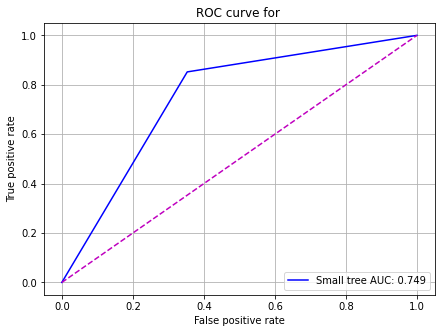

In [130]:
get_ROC_plot(small_tree_estimator, test_labels, small_tree_predictions,"Small tree")

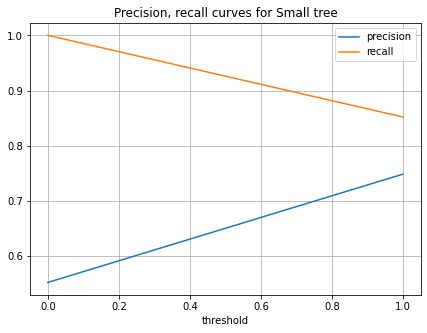

In [131]:
get_prec_recall_plot(test_labels,small_tree_predictions, "Small tree")

##Deep decision tree

In [132]:
deep_tree_estimator = tree.DecisionTreeClassifier(random_state=1, max_depth = 15)
#training of the classifier
deep_tree_estimator.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [133]:
deep_tree_predictions = deep_tree_estimator.predict(test_data)
get_metrics(deep_tree_estimator,test_labels,deep_tree_predictions,"Deep tree")

Metrics for Deep tree
Precision:	0.762
Recall: 	0.743
Accurancy:	0.730
F1-score:	0.752
Log_loss:	6.023


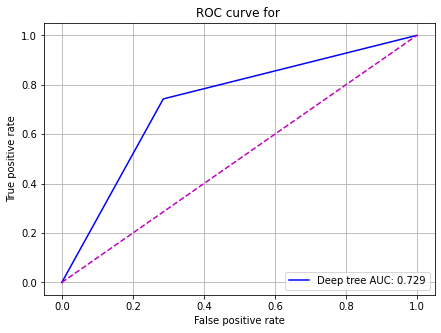

In [134]:
get_ROC_plot(deep_tree_estimator, test_labels,deep_tree_predictions,"Deep tree")

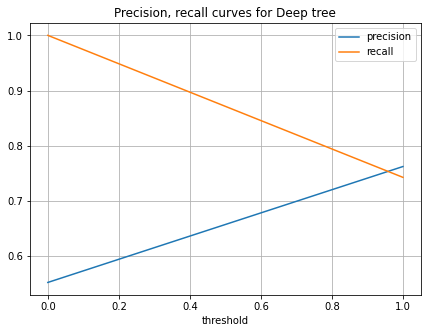

In [135]:
get_prec_recall_plot(test_labels,deep_tree_predictions, "Deep tree")

##Random forest on small trees

In [136]:
rf_small_estimator = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)
rf_small_predictions = rf_small_estimator.fit(train_data,train_labels)

In [137]:
rf_small_predictions = rf_small_predictions.predict(test_data)
get_metrics(rf_small_estimator,test_labels,rf_small_predictions,"RF small")

Metrics for RF small
Precision:	0.693
Recall: 	0.814
Accurancy:	0.698
F1-score:	0.749
Log_loss:	0.625


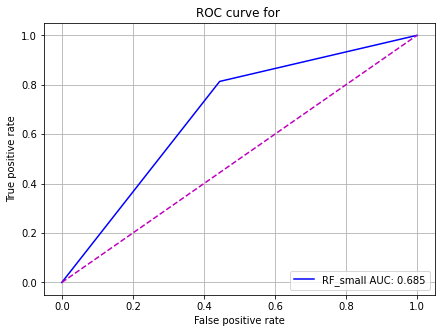

In [138]:
get_ROC_plot(rf_small_estimator,test_labels,rf_small_predictions,"RF_small")

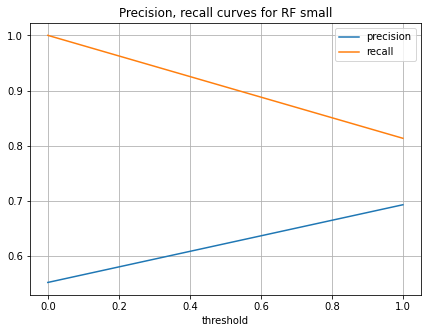

In [139]:
get_prec_recall_plot(test_labels,rf_small_predictions, "RF small")

##Random forest on deep trees

In [140]:
rf_deep_estimator = RandomForestClassifier(n_estimators = 50, max_depth = 15, random_state = 1)
rf_deep_estimator = rf_deep_estimator.fit(train_data,train_labels)

In [141]:
rf_deep_predictions = rf_deep_estimator.predict(test_data)
get_metrics(rf_deep_estimator,test_labels,rf_deep_predictions,"RF deep")

Metrics for RF deep
Precision:	0.822
Recall: 	0.778
Accurancy:	0.784
F1-score:	0.799
Log_loss:	0.472


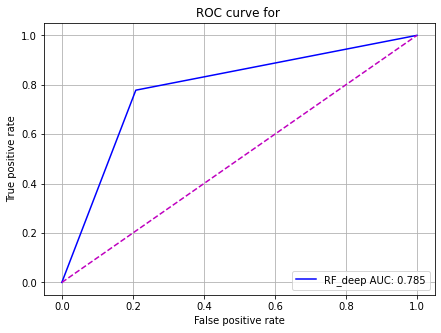

In [142]:
get_ROC_plot(rf_deep_estimator,test_labels,rf_deep_predictions,"RF_deep")

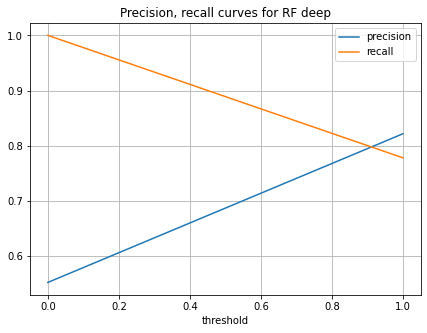

In [143]:
get_prec_recall_plot(test_labels,rf_deep_predictions, "RF deep")

##Algorithm w/o FN

In [144]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_data, train_labels)
prediction = clf.predict(test_data)
print("GaussianNB")
print("Precision: {0:.3f}\nRecall: {1:.3f}\nAccurancy: {2}\nF1-score: {3}".format(
    metrics.precision_score(test_labels, prediction),
    metrics.recall_score(test_labels, prediction),
    metrics.accuracy_score(test_labels, prediction),
    metrics.f1_score(test_labels, prediction)))
prediction = clf.predict_proba(test_data)
prediction = prediction[:,1]
print("Log_loss: {0:.3f}".format(metrics.log_loss(test_labels, prediction)))

GaussianNB
Precision: 0.601
Recall: 0.926
Accurancy: 0.6198934280639432
F1-score: 0.7291139240506329
Log_loss: 12.909


In [145]:
print(test_labels)
print(prediction)

[0 0 0 ... 0 1 0]
[1.00000000e+000 1.49069196e-175 1.46398127e-285 ... 1.00000000e+000
 1.00000000e+000 9.37756058e-001]


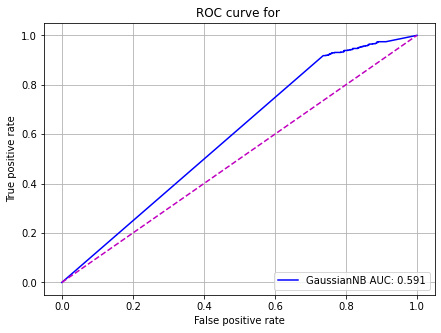

In [146]:
get_ROC_plot(clf, test_labels, prediction, "GaussianNB")

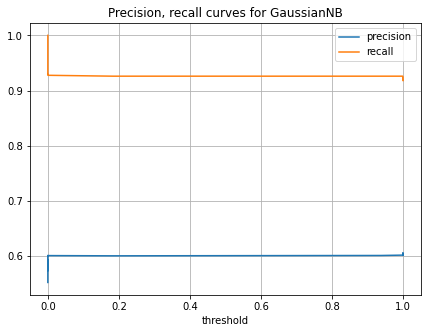

In [147]:
precs = []
recs = []
threshs = []
for prediction, test_labels in zip([prediction],[test_labels]):
  prec, rec, thresh = metrics.precision_recall_curve(test_labels,prediction)
  precs.append(prec)
  recs.append(rec)
  threshs.append(thresh)

plt.figure(figsize=(7, 5))
plt.grid(True)
plt.plot(threshs[0], precs[0][:-1], label="precision")
plt.plot(threshs[0], recs[0][:-1], label="recall")
plt.xlabel("threshold")
plt.title("Precision, recall curves for GaussianNB")
plt.legend()

##DRAFt

In [ ]:
#draw ROC
y = label_binarize(test_labels, classes=[0, 1])
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(test_data[:,i], predictions[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
#draw ROC curve for given x and y
metrics.plot_roc_curve(rf_deep_estimator, test_data, test_labels, name="RF_deep")   
plt.show()